In [178]:
#import modules and renew token
from __future__ import print_function
import sys
import spotipy
import spotipy.util as util
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
%matplotlib inline

username = 'jehogan1223'
scope = 'user-library-read playlist-read-private playlist-modify-public'
scope = 'user-library-read'
#scope = 'playlist-read-collaborative'
#scope = 'playlist-modify-public'

#username = 'jehogan1223'
client_id ="8094db171b144addb652aa0cf2cc1e5a" 
client_secret = "f5eb3081a4e642999f441cdecb344ecf"
redirect_uri = 'http://localhost:7777/callback'
print(username)
token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)
token

jehogan1223


'BQD48ndkcImsVh9muDHWon7B7EobmWZ68OsSiQEbKctvcHW1Whd0mbu88sIK-vaBugc8LXv_ykEYwD_BA0YIbrAgyUacqOW83h8xARgOWioIA9bYDHroQt9L123i49BLb0OUv2e1KQLIYRzIOzrZLE0nBPBiesJLLxAqVRhaEr3HjapDarM3uJyOjq5su47nOtQ2Q70g'

In [179]:
#get 50 songs from user saved library
def get_songs(songoffset):
    tracknames = []
    ids = []
    dateadded = []

    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.current_user_saved_tracks(limit=50, offset = songoffset)
        playlists = sp.current_user_playlists(limit=50, offset=0)
        for item in results['items']:
            track = item['track']['name']
            trackid = item['track']['id']
            addedat = item['added_at']
            #print(trackid)
            #print(track['name'] + ' - ' + track['artists'][0]['name'])

            tracknames.append(track)
            #trackid = get_id(track['name'],token)
            ids.append(trackid)
            dateadded.append(addedat)
            #features = get_features(trackid, token)
            #trackfeatures.append(features)
    else:
        print("Can't get token for", username)
    features = sp.audio_features(ids) 
    df = pd.DataFrame(features)
    trackdesc = df.describe()
    mean = trackdesc.iloc[1]
    dfpca = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms','time_signature']]
    
    tracknames = pd.DataFrame(tracknames,columns=['song_name'])
    dateadded = pd.DataFrame(dateadded,columns=['date_added'])
    df = pd.concat([df,tracknames,dateadded], axis = 1)
    
    return df

In [180]:
get_songs(0)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,date_added
0,0.659,0.570,6,-9.748,0,0.1330,0.229000,0.001960,0.4980,0.2180,122.110,audio_features,2TqufSS0yIHjfNQe5rkpZM,spotify:track:2TqufSS0yIHjfNQe5rkpZM,https://api.spotify.com/v1/tracks/2TqufSS0yIHj...,https://api.spotify.com/v1/audio-analysis/2Tqu...,244007,4,Worship,2020-09-24T23:22:08Z
1,0.407,0.252,0,-12.989,0,0.0333,0.939000,0.926000,0.2050,0.2090,179.983,audio_features,05MWDeF4VV8R1IDmqF0eQF,spotify:track:05MWDeF4VV8R1IDmqF0eQF,https://api.spotify.com/v1/tracks/05MWDeF4VV8R...,https://api.spotify.com/v1/audio-analysis/05MW...,165082,3,Pyre,2020-09-24T22:19:00Z
2,0.535,0.239,7,-12.193,1,0.0313,0.265000,0.014500,0.1100,0.0398,92.738,audio_features,0e7O1IF4fcrSfpuixNRdSI,spotify:track:0e7O1IF4fcrSfpuixNRdSI,https://api.spotify.com/v1/tracks/0e7O1IF4fcrS...,https://api.spotify.com/v1/audio-analysis/0e7O...,202493,4,Down in the Desert,2020-09-24T17:06:30Z
3,0.585,0.649,9,-7.724,1,0.0533,0.030300,0.078300,0.3360,0.4260,139.565,audio_features,1lA3L4FCvMLX2Sif6LsGNB,spotify:track:1lA3L4FCvMLX2Sif6LsGNB,https://api.spotify.com/v1/tracks/1lA3L4FCvMLX...,https://api.spotify.com/v1/audio-analysis/1lA3...,217859,4,The Lark,2020-09-24T16:05:47Z
4,0.668,0.605,2,-7.608,0,0.0454,0.336000,0.000206,0.1150,0.8770,83.002,audio_features,384TJj6XyHUyNlCbdgm6Sz,spotify:track:384TJj6XyHUyNlCbdgm6Sz,https://api.spotify.com/v1/tracks/384TJj6XyHUy...,https://api.spotify.com/v1/audio-analysis/384T...,245995,4,MANGO (feat. Adeline),2020-09-23T14:18:31Z
5,0.592,0.520,6,-8.626,1,0.1050,0.292000,0.000000,0.0948,0.5850,145.995,audio_features,0KKUt5Pub36RdhUUzsqk4H,spotify:track:0KKUt5Pub36RdhUUzsqk4H,https://api.spotify.com/v1/tracks/0KKUt5Pub36R...,https://api.spotify.com/v1/audio-analysis/0KKU...,210297,4,BOA,2020-09-23T14:18:24Z
6,0.693,0.406,9,-8.154,1,0.0524,0.571000,0.782000,0.1150,0.5710,104.987,audio_features,7dNqszkx1prIf0m33E8gDw,spotify:track:7dNqszkx1prIf0m33E8gDw,https://api.spotify.com/v1/tracks/7dNqszkx1prI...,https://api.spotify.com/v1/audio-analysis/7dNq...,315086,4,Blow Up,2020-09-22T18:00:19Z
7,0.662,0.657,7,-10.002,1,0.0345,0.288000,0.856000,0.1020,0.0584,117.986,audio_features,24upABZ8A0sAepfu91sEYr,spotify:track:24upABZ8A0sAepfu91sEYr,https://api.spotify.com/v1/tracks/24upABZ8A0sA...,https://api.spotify.com/v1/audio-analysis/24up...,390639,4,Moon (And It Went Like),2020-09-22T15:23:26Z
8,0.512,0.691,8,-6.794,0,0.0384,0.164000,0.000241,0.1100,0.5180,121.807,audio_features,6pj2yQlRvxYKLMxMTJaUUT,spotify:track:6pj2yQlRvxYKLMxMTJaUUT,https://api.spotify.com/v1/tracks/6pj2yQlRvxYK...,https://api.spotify.com/v1/audio-analysis/6pj2...,413640,4,Roscoe - Beyond the Wizard's Sleeve Remix,2020-09-22T05:45:00Z
9,0.362,0.463,2,-4.680,1,0.0285,0.326000,0.034900,0.0994,0.1800,139.986,audio_features,0w9BogmsQSklaERVHIF9e1,spotify:track:0w9BogmsQSklaERVHIF9e1,https://api.spotify.com/v1/tracks/0w9BogmsQSkl...,https://api.spotify.com/v1/audio-analysis/0w9B...,198600,4,I'm Fine,2020-09-22T05:09:26Z


In [181]:
#get songs in multiples of 50
start = 0
df = get_songs(start)
for i in range(start+1,start+20):
    offset = i*50
    dfcurrent = get_songs(offset)
    print(offset)
    df = pd.concat([df,dfcurrent])
    i += 1
df = df.reset_index(drop=True)
df['Label'] = '0'
#dfpca = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms','time_signature']]
#x_pca_all = library_pca(dfpca)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [177]:
df['Label']='1'
dfmatt = df

In [182]:
dfjack = df

In [191]:
#create model for classifying songs for each user
#create list of songs which model has lowest confidence in classifying, represents the songs users tastes have in common

allsongfeatures = pd.concat([dfjack,dfmatt])
numsongs = len(allsongfeatures)

allsongfeatures = allsongfeatures.reset_index(drop=True)

X = allsongfeatures[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split

y = allsongfeatures['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#fit on everything
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X,y)

predictions = logmodel.predict(X)
predictionsproba = logmodel.predict_proba(X)
from sklearn.metrics import classification_report
print(classification_report(y,predictions))

sharedliked = []
for predict in enumerate(predictionsproba):
    if .497 < predict[1][0] < .503:
        sharedliked.append(predict[0])
sharedliked
sharedlikedsongs = allsongfeatures.iloc[sharedliked]

from sklearn.utils import shuffle
sharedlikedsongsshuffled = shuffle(sharedlikedsongs).reset_index(drop=True)

len(sharedliked)

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      1000
           1       0.61      0.68      0.64      1000

    accuracy                           0.62      2000
   macro avg       0.63      0.62      0.62      2000
weighted avg       0.63      0.62      0.62      2000



23

In [187]:
testfraction

0.16666666666666666

C:\Users\hogan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


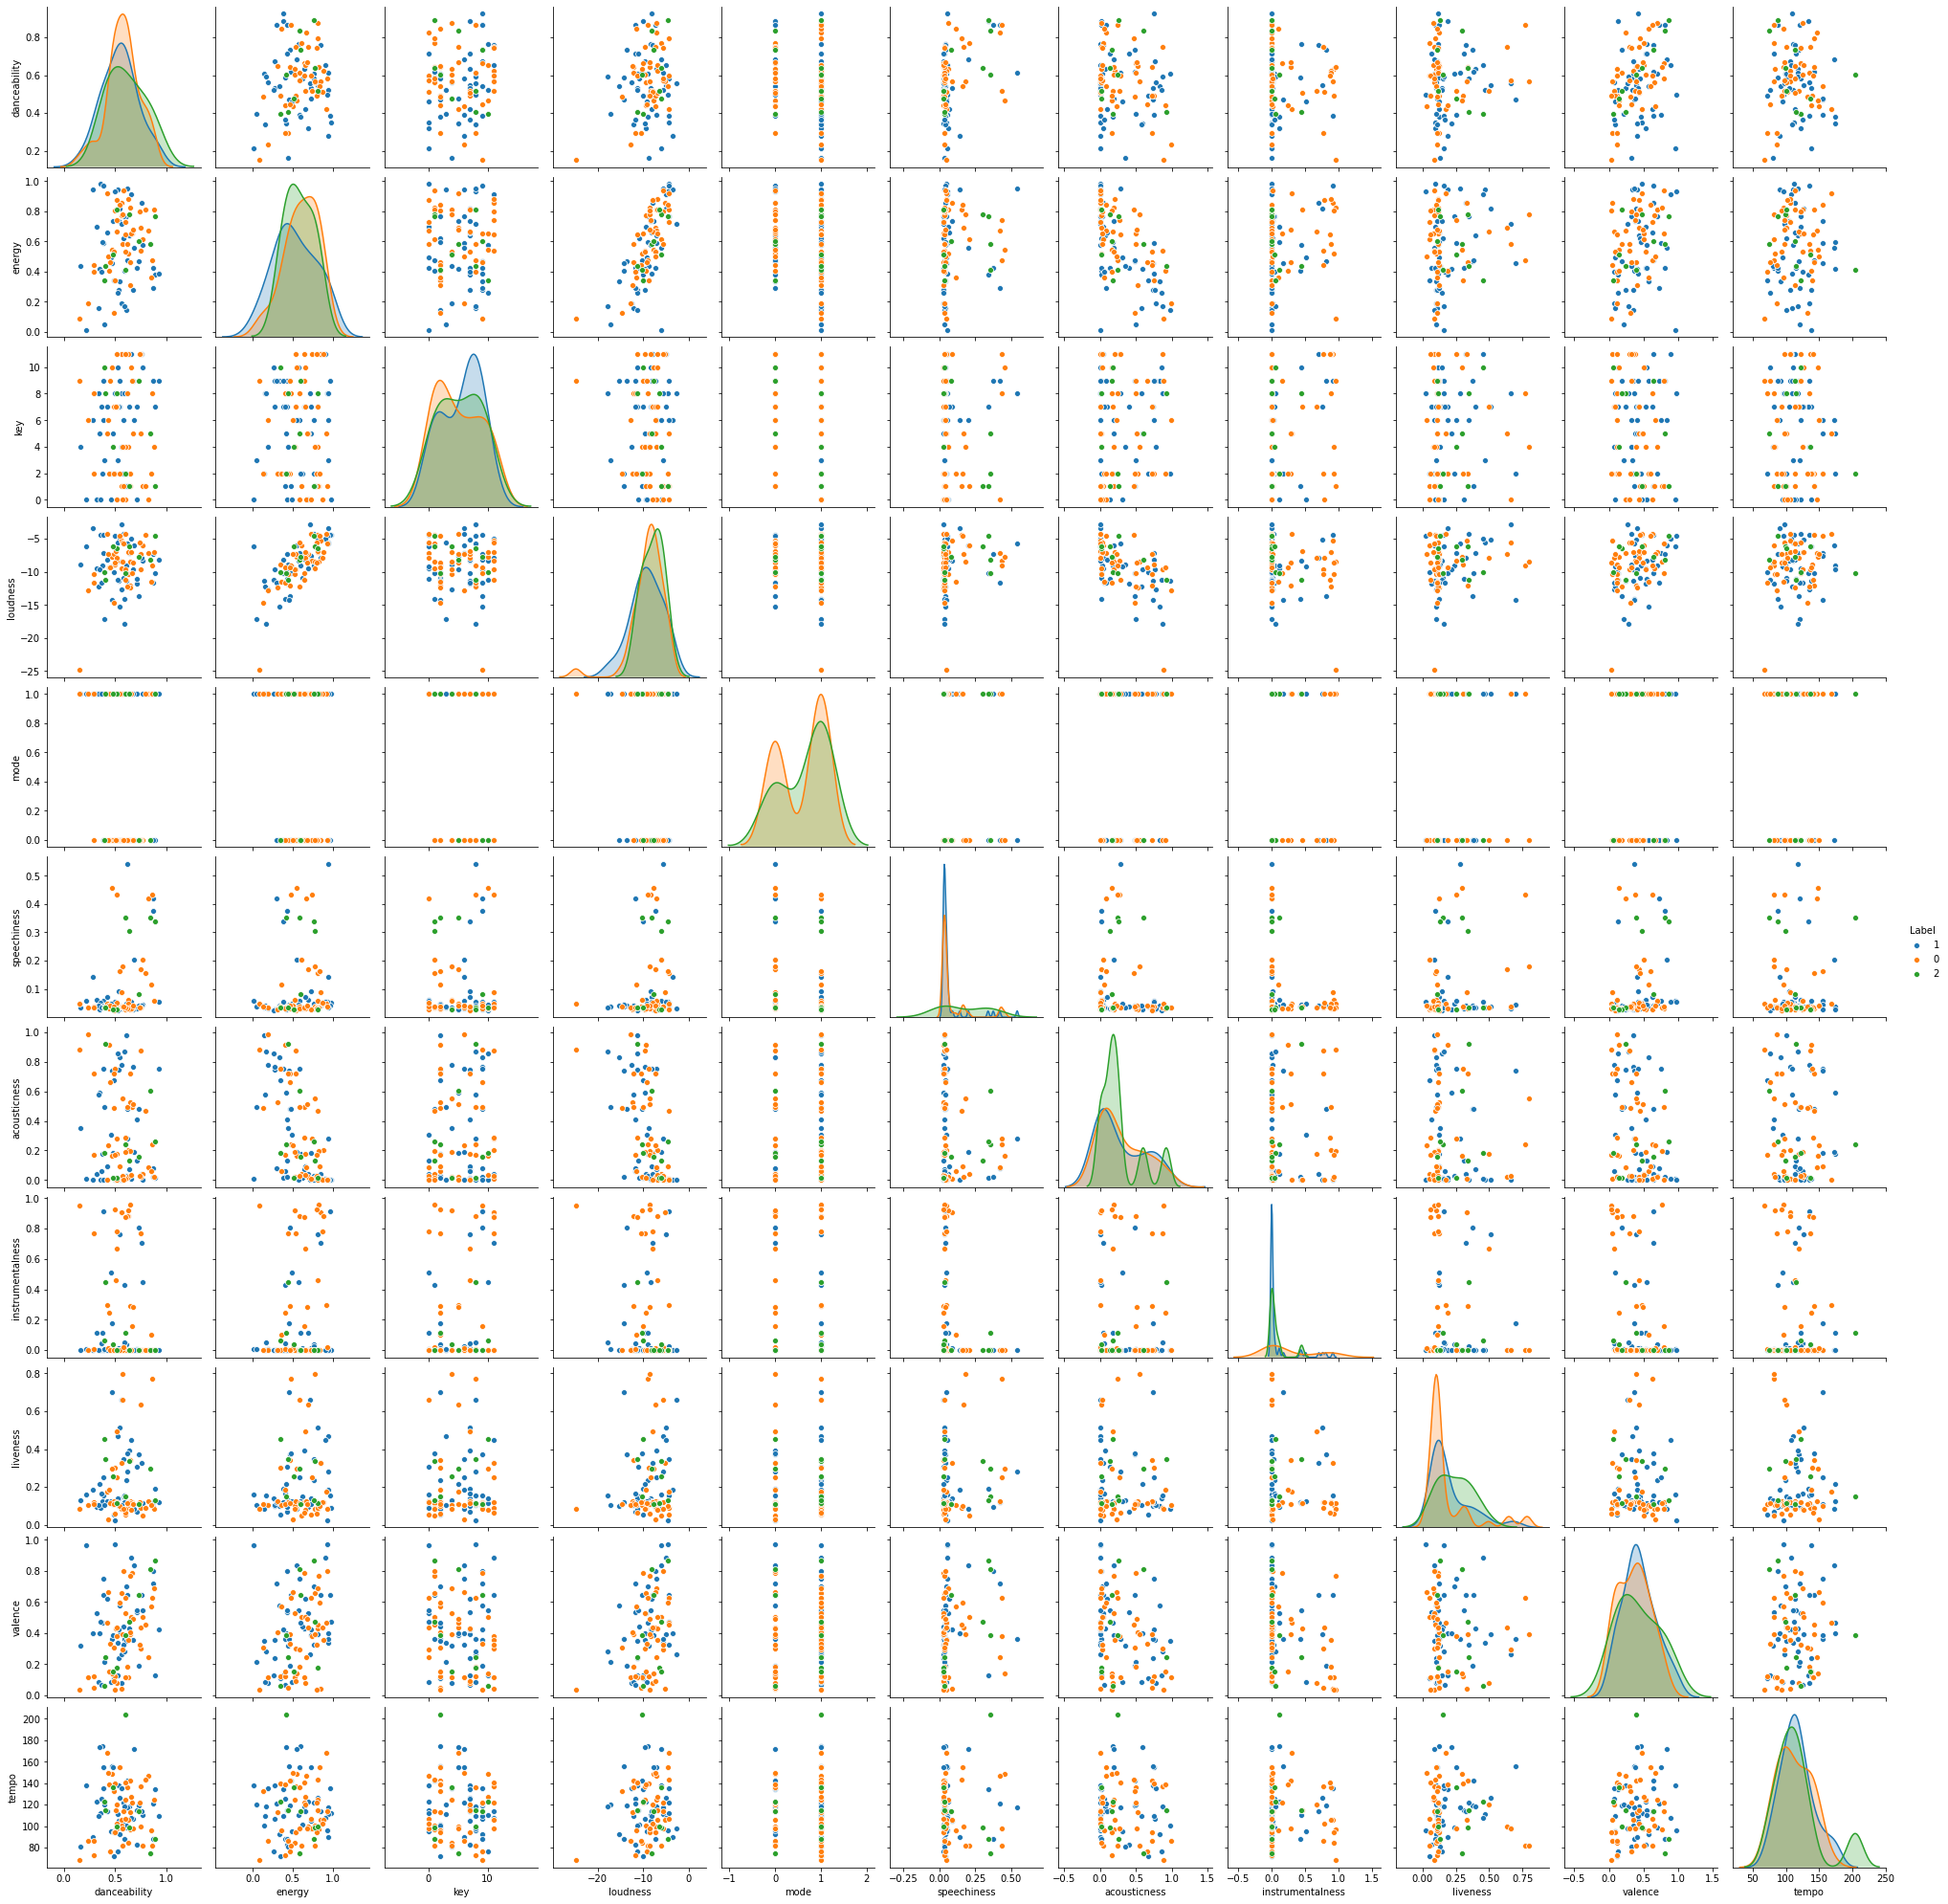

In [188]:
#pairplot of song features. 0 (blue) = first person, 1 (orange) = second person, 2 (green) = shared tastes, points fit had low confidence 
allsongfeaturesmod = allsongfeatures
allsongfeaturesmod.loc[sharedliked,'Label'] = 2

testfraction  = 100/len(allsongfeaturesmod)


X = allsongfeaturesmod
y = allsongfeatures['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testfraction, random_state=42)

forplotting = X_test[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','Label']]
sns.pairplot(forplotting,hue = 'Label')

In [ ]:
# gruz spotify:playlist:1RoJ9IFTkzPU49MoE45jhO
#bathroomies spotify:playlist:1ryhtaEV7PNNspru6ZDFry

In [153]:
#allsongfeaturesmod[['song_name','Label']].values.tolist()

In [ ]:
#bathroomies spotify:playlist:1ryhtaEV7PNNspru6ZDFry

In [192]:
#add songs to playlist, won't overwrite just adds to end
if token:
    sp = spotipy.Spotify(auth=token)
    sp.playlist_add_items('1RoJ9IFTkzPU49MoE45jhO', sharedlikedsongs['id'], position=None)

In [ ]:
#cells below contain different analysis for comparing spotify tastes including playlist feature queries and 2D PCA analysis

In [ ]:
#compare user songs and playist songs from above using 2D PCA
#pca for songs
pca = PCA(n_components=2)
pca.fit(dfpca)
x_pca = pca.transform(dfpca)

#pca for clplaylist
#pcacl = PCA(n_components=2)
#pca.fit(dfclpca)
x_pcacl = pca.transform(dfclpca)

#mean stats
trackdesc = df.describe()
mean = trackdesc.iloc[1]

trackdesc = dfcl.describe()
meancl = trackdesc.iloc[1]

fig = plt.figure()
#plt.fig(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x_pca[:,0],x_pca[:,1], s=10, c='b', marker="s", label='saved')
ax1.scatter(x_pcacl[:,0],x_pcacl[:,1], s=10, c='r', marker="o", label='playlist')
plt.legend(loc='upper left');
plt.show()
#plt.scatter(x_pca[:,0],x_pca[:,1], cmap='plasma')
#plt.xlabel('First principal component')
#plt.ylabel('Second Principal Component')

In [ ]:
#get features for user defined (by id) playlist
import pandas as pd 
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials
cid ="8094db171b144addb652aa0cf2cc1e5a" 
secret = "f5eb3081a4e642999f441cdecb344ecf" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False
#results = sp.current_user_saved_tracks()
playlist = sp.user_playlist("jehogan1223",'0UXaRr941RfE4k6WIKYXrG') 
songs = playlist["tracks"]["items"] 
tracknames = []
ids = []
dateadded = []
for i in range(len(songs)-10): 
    ids.append(songs[i]["track"]["id"])
    tracknames.append(songs[i]["track"]["name"])
    dateadded.append(songs[i]['added_at'])

features = sp.audio_features(ids) 
dfplaylist = pd.DataFrame(features)

tracknames = pd.DataFrame(tracknames,columns=['song_name'])
dateadded = pd.DataFrame(dateadded,columns=['date_added'])

dfplaylist = pd.concat([dfplaylist,tracknames,dateadded], axis = 1)
dfplaylist['Label'] = '1'

#dfpca = dfcl[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [ ]:
dfpcabigchoons = dfclpca

In [ ]:
sns.pairplot(allsongfeatures,hue = 'Label')
# allsongfeatures = pd.concat([allsongfeatures,labels],axis = 1)
# allsongfeatures

No handles with labels found to put in legend.


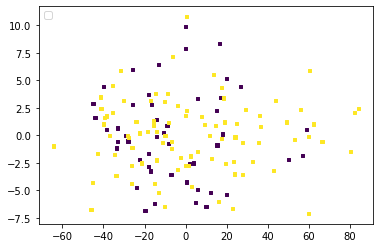

In [613]:
#compare user songs and playist songs from above using 2D PCA
#pca for songs
allsongfeatures = pd.concat([dfpca,dfclpca])
labels = pd.concat([df['Label'],dfcl['Label']])

pca = PCA(n_components=2)
pca.fit(allsongfeatures)
x_pca = pca.transform(allsongfeatures)

#pca for clplaylist
#pcacl = PCA(n_components=2)
#pca.fit(dfclpca)
#x_pcacl = pca.transform(dfclpca)

#mean stats
trackdesc = df.describe()
mean = trackdesc.iloc[1]

trackdesc = dfcl.describe()
meancl = trackdesc.iloc[1]

fig = plt.figure()
#plt.fig(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x_pca[:,0],x_pca[:,1], s=10, c=labels, marker="s")
#ax1.scatter(x_pcacl[:,0],x_pcacl[:,1], s=10, c='r', marker="o", label='playlist')
plt.legend(loc='upper left');
plt.show()
#plt.scatter(x_pca[:,0],x_pca[:,1], cmap='plasma')
#plt.xlabel('First principal component')
#plt.ylabel('Second Principal Component')

<BarContainer object of 10 artists>

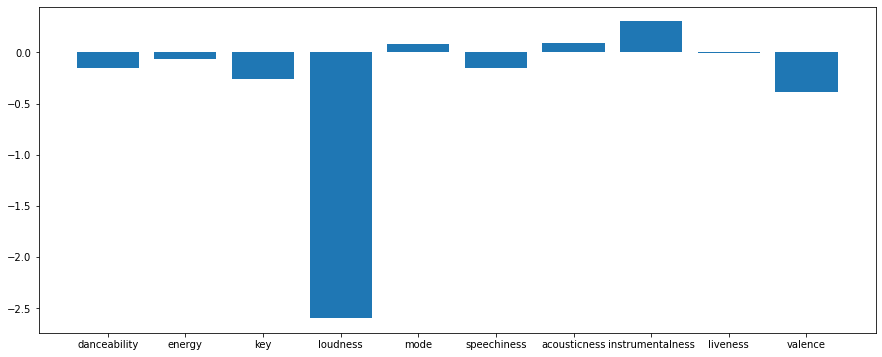

In [571]:
#compare two playlists features as a difference
trackdesc = df.describe()
mean = trackdesc.iloc[1][0:10]

trackdesc = dfcl.describe()
meancl = trackdesc.iloc[1][0:10]

meandif = mean - meancl

labels = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms']
labels = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence']
plt.figure(figsize=(15,6))
plt.bar(labels,meandif)

In [680]:
#get playlists names and ids
playlistnames = []
playlistids = []
for playlist in playlists['items']:
    playlistname = playlist['name']
    playlistid = playlist['id']
    
    if playlistname not in 'Pontoon Todder Choons':
        playlistnames.append(playlistname)
        playlistids.append(playlistid)

In [681]:
playlistnames[0]
playlistids

['1bIaor5x76BylWyIZXqMeP',
 '37i9dQZF1DXa71eg5j9dKZ',
 '0UXaRr941RfE4k6WIKYXrG',
 '3IuLXrQuO5MqtBp0wue9ag',
 '4k8Zmc2g4SfRjsCZ0oj13n',
 '0VaeW1jWYY8N3fWzPEREsA',
 '0gMfSRecpQ8Qa99oWmWPFO',
 '6Ork0pZeNHn50PgOLeReTq',
 '37i9dQZF1EtdVuHW6kwgdU',
 '5hnqLB1V5ihmppDiiq4I82',
 '58baE53F2VStEektZwJEbM',
 '4IL8yhD3auLiPP9XR6aNvE',
 '6HIBakvw9mk5f0wOhZOzEV',
 '0jV8VdSGBm9TzqacMnVdce',
 '0gnQguftgICBfKCWk91SQr',
 '1i6X19MREFy6nIoqgKrgSE',
 '269OidmHegXSyzGBWJITQq',
 '7cdXwvjmaGEeYm7l5YrogH',
 '2k3SGPAldY4eajNhDj2Ymn',
 '37i9dQZEVXcWhczd7vJQ7S',
 '3N9eoPKlHlBSmZAQmcUnLZ',
 '28oHhF4q3tz99fJSZtiLZ8',
 '3IEMye6uVPKLCAAyVyoGYS',
 '1vD36DSW3trHPhReAZgFaT',
 '2W91tZJhpx6KdF8wkEFPzm',
 '0TmPuW7smYVOQzxku43J3a',
 '6CDgZPeEVtuc6m7xMYrI6O',
 '6HuVkSlSLR87NjYL4GC6jj',
 '3dcIL2jlrv2dgkpe9rvtlh',
 '6oVdBSM13qt8amFh2FnKob',
 '1zy1KCK3ojDFahjGuiEBjF',
 '3VsL575DQgJDcj8vE0Ws8N',
 '5h7AmRG9re2Is9xPxYkQoq',
 '4Ai5V1wS1kFQdXjw73ybqU',
 '3u1YPe5CbSBYivOVCLSQt7',
 '6fJDXx5JHaG6VdseCiDxTr',
 '51ePQxa7uPHVh9W5Te1dBC',
 

In [670]:
def get_playlist_features(playlist_id):
    import pandas as pd 
    import spotipy 
    sp = spotipy.Spotify() 
    from spotipy.oauth2 import SpotifyClientCredentials
    cid ="8094db171b144addb652aa0cf2cc1e5a" 
    secret = "f5eb3081a4e642999f441cdecb344ecf" 
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
    sp.trace=False
    playlist = sp.user_playlist("jehogan1223",playlist_id) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    for i in range(len(songs)):
        ids.append(songs[i]["track"]["id"]) 
    features = sp.audio_features(ids) 
    dfplaylist = pd.DataFrame(features)
    dfplaylistpca = dfplaylist[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
    return dfplaylistpca

In [708]:
#get features from all playlists listed in variable 'playlists' by id
count = 0
playlistfeaturesby = []
for playlistid in playlistids:
    playlistfeatures = get_playlist_features(playlistid)
    playlistfeaturesby.append(playlistfeatures)
    count += 1 


AttributeError: 'NoneType' object has no attribute 'split'

In [434]:
def playlist_pca(dfplaylistfeatures):
    scaler = StandardScaler()
    scaler.fit(dfplaylistfeatures)
    dfscaled = scaler.transform(dfplaylistfeatures)

    #pca for songs
    pca = PCA(n_components=2)
    pca.fit(dfscaled)
    x_pca = pca.transform(dfscaled)

    #mean stats
    trackdesc = dfplaylistfeatures.describe()
    mean = trackdesc.iloc[1]
    return x_pca

In [556]:
playlistnames

['BIG Chunes',
 'biker boyz soundtrack',
 'Cellar Dwellers',
 'airplane music ',
 'Hummingbird',
 'Your Top Songs 2019',
 "Rap's Fresh Faces ",
 "90's Hits",
 'moody boy',
 '27',
 'sensitivo',
 'hype',
 'Woozy',
 'My Shazam Tracks',
 '.landshart',
 'Liked from Radio',
 'Discover Weekly',
 'get up',
 'Shake That ',
 'Steve',
 'Best Of 2015: Top Tracks',
 'Gibralter',
 'Synthwave Destruction',
 'Today',
 'My Bonnaroo 2016',
 'nudes',
 'Cloudy BBQ',
 'SNAFU',
 'tears of bindle',
 'Earth Day',
 'Equally Suggestive ',
 'phatass',
 'Bindle Bangerz',
 'ender',
 'No more birthdays',
 'on low heat',
 'Next',
 'Faded',
 'Benches',
 'dreamboat',
 'peachy',
 'jock jords jersey jams bindle banger blowout bananza',
 'halfway',
 'Spur',
 'Agent Orange']

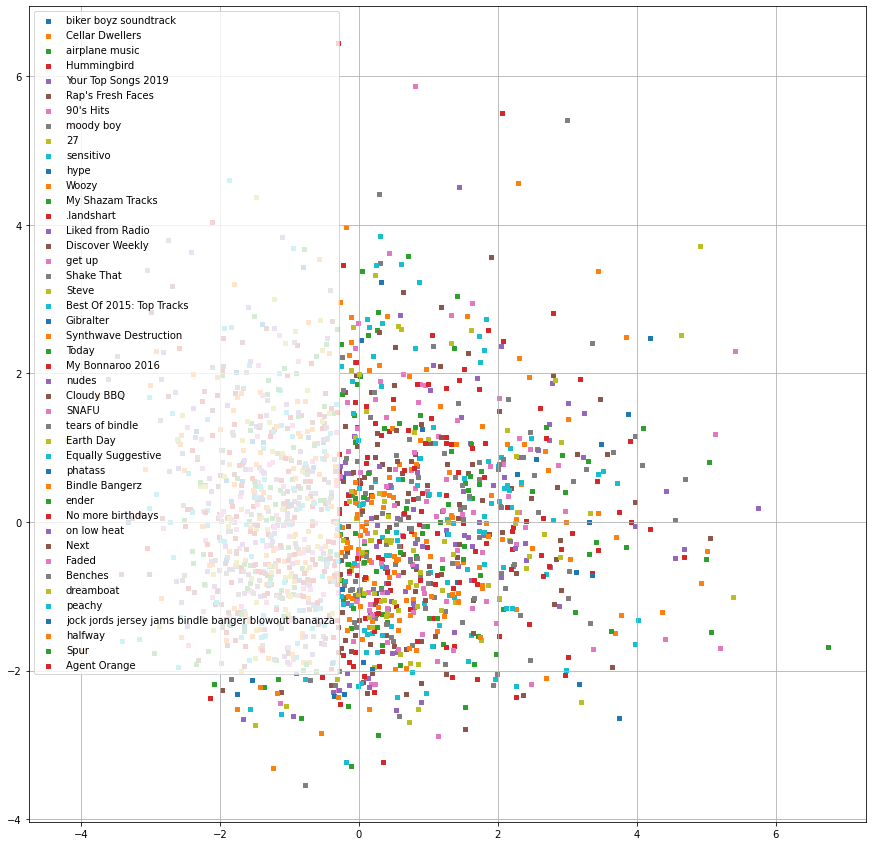

In [427]:
#plot playlists features using 2D PCA
scaler = StandardScaler()
scaler.fit(playlistfeaturesby)
dfscaled = scaler.transform(playlistfeaturesby)

#pca for songs
pca = PCA(n_components=2)
pca.fit(dfscaled)
x_pca = pca.transform(dfscaled)

#mean stats
trackdesc = dfplaylistfeatures.describe()
mean = trackdesc.iloc[1]
    
count = 0 
fig, ax1 = plt.subplots(figsize=(15,15))
for playlistfeatures in playlistfeaturesby:
    x_pca = playlist_pca(playlistfeatures)
    playlistname = playlistnames[count]

    ax1.scatter(x_pca[:,0],x_pca[:,1], s=10, marker="s", label=playlistname)
    count += 1

ax1.legend(loc='upper left')
ax1.grid(True)

plt.show()

In [488]:
#get 50 songs from user saved library
def get_songs(songoffset):
    tracknames = []
    ids = []
    dateadded = []

    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.current_user_saved_tracks(limit=50, offset = songoffset)
        playlists = sp.current_user_playlists(limit=50, offset=0)
        for item in results['items']:
            track = item['track']['name']
            trackid = item['track']['id']
            addedat = item['added_at']
            #print(trackid)
            #print(track['name'] + ' - ' + track['artists'][0]['name'])

            tracknames.append(track)
            #trackid = get_id(track['name'],token)
            ids.append(trackid)
            dateadded.append(addedat)
            #features = get_features(trackid, token)
            #trackfeatures.append(features)
    else:
        print("Can't get token for", username)
    features = sp.audio_features(ids) 
    df = pd.DataFrame(features)
    trackdesc = df.describe()
    mean = trackdesc.iloc[1]
    dfpca = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms','time_signature']]
    
    tracknames = pd.DataFrame(tracknames,columns=['song_name'])
    dateadded = pd.DataFrame(dateadded,columns=['date_added'])
    df = pd.concat([df,tracknames,dateadded], axis = 1)
    
    return df

In [384]:
def library_pca(dflibraryfeatures):
    scaler = StandardScaler()
    scaler.fit(dflibraryfeatures)
    dfscaled = scaler.transform(dflibraryfeatures)

    #pca for songs
    pca = PCA(n_components=2)
    pca.fit(dfscaled)
    x_pca = pca.transform(dfscaled)
    #mean stats
    trackdesc = dflibraryfeatures.describe()
    mean = trackdesc.iloc[1]
    return x_pca

In [391]:
start = 0
df = get_songs(start)
for i in range(start+1,start+70):
    offset = i*50
    dfcurrent = get_songs(offset)
    print(offset)
    df = pd.concat([df,dfcurrent])
    i += 1
df = df.reset_index(drop=True)
dfpca = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms','time_signature']]
x_pca_all = library_pca(dfpca)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450


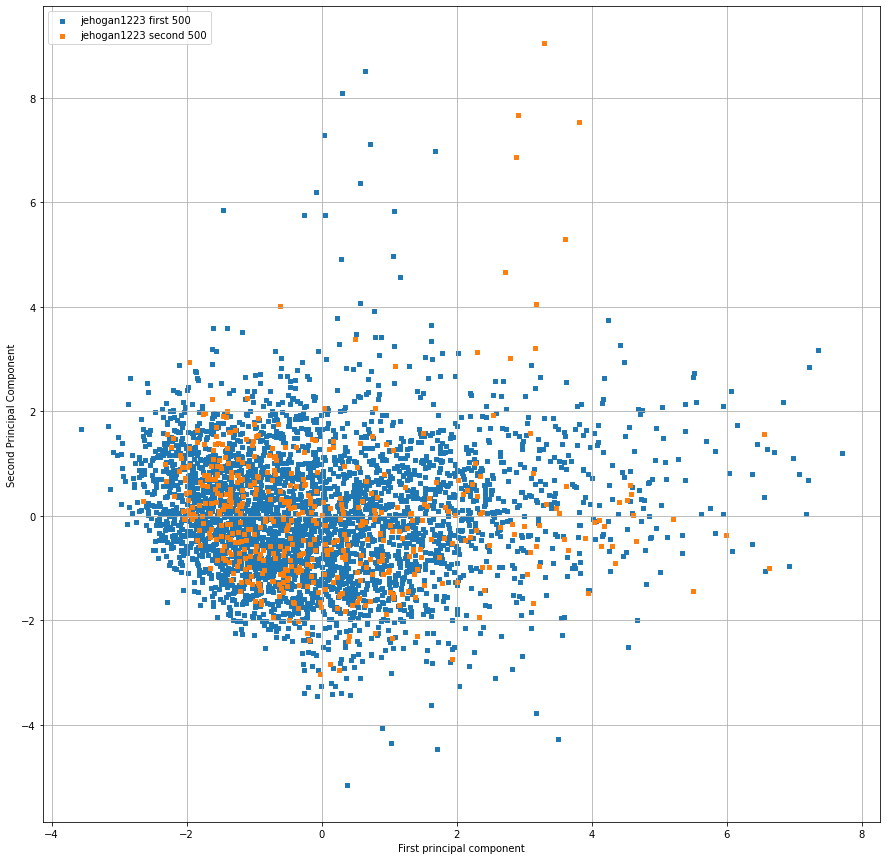

In [392]:
fig, ax1 = plt.subplots(figsize=(15,15))
ax1.scatter(x_pca_all[:,0],x_pca_all[:,1], s=10, marker="s", label='jehogan1223 first 500')
ax1.scatter(x_pca2500[:,0],x_pca2500[:,1], s=10, marker="s", label='jehogan1223 second 500')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(loc='upper left')
ax1.grid(True)
plt.show()

In [367]:
x_pca

array([[ 8.37619694e+04,  1.85051116e+01],
       [ 8.42596928e+03,  2.03368415e+01],
       [ 6.68689716e+04, -4.24946662e+01],
       [ 6.00696821e+03,  5.04032364e+01],
       [ 4.05228970e+05, -2.11033258e+00],
       [ 5.29349706e+04, -1.59158384e+01],
       [-1.07545031e+05,  2.31823606e+01],
       [ 3.42329714e+04, -3.87488625e+01],
       [-1.55980291e+04, -2.43895041e+01],
       [ 3.32289679e+04,  6.00380005e+01],
       [-1.15900294e+04, -1.72948878e+01],
       [-7.09450290e+04, -3.03561851e+01],
       [ 4.36339703e+04, -6.60559399e+00],
       [ 1.92649698e+04,  4.81889797e+00],
       [ 4.19349712e+04, -3.18371836e+01],
       [-1.10380291e+04, -2.62951896e+01],
       [ 5.01349705e+04, -1.22266590e+01],
       [-2.16280302e+04,  5.35113728e+00],
       [-2.30902937e+03, -1.78720732e+01],
       [ 1.72138969e+05,  2.43332900e+01],
       [-1.03958030e+05,  8.46130767e+00],
       [ 4.63619704e+04, -1.12256297e+01],
       [-1.10329030e+05,  2.31146225e+00],
       [ 7.

In [260]:
#get songs from user defined artist
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=cid,
                                                           client_secret=secret))

results = sp.search(q='weezer', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 Island In The Sun
1 Say It Ain't So
2 Buddy Holly
3 Beverly Hills
4 Undone - The Sweater Song
5 Lost in the Woods - Weezer Version
6 Hash Pipe
7 Africa
8 My Name Is Jonas
9 Beginning Of The End - Wyld Stallyns Edit
10 Hero
11 Feels Like Summer
12 Pork And Beans
13 El Scorcho
14 Take on Me
15 Everybody Wants to Rule the World
16 Weezer Medley
17 Daydream
18 Fancy
19 Amber


{'href': 'https://api.spotify.com/v1/users/jehogan1223/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'description': '',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/4k8Zmc2g4SfRjsCZ0oj13n'},
   'href': 'https://api.spotify.com/v1/playlists/4k8Zmc2g4SfRjsCZ0oj13n',
   'id': '4k8Zmc2g4SfRjsCZ0oj13n',
   'images': [{'height': 640,
     'url': 'https://mosaic.scdn.co/640/ab67616d0000b27374c8a307ae024f78a126ad73ab67616d0000b273b6633bf21d88d387177e6784ab67616d0000b273dbaa23bd2358ef6bf7451a3aab67616d0000b273fde8a5609d388b054bbc697b',
     'width': 640},
    {'height': 300,
     'url': 'https://mosaic.scdn.co/300/ab67616d0000b27374c8a307ae024f78a126ad73ab67616d0000b273b6633bf21d88d387177e6784ab67616d0000b273dbaa23bd2358ef6bf7451a3aab67616d0000b273fde8a5609d388b054bbc697b',
     'width': 300},
    {'height': 60,
     'url': 'https://mosaic.scdn.co/60/ab67616d0000b27374c8a307ae024f78a126ad73ab67616d0000b273b6633bf21d88d387177e6784ab67616d0000b273dbaa2

In [413]:
bikerboyz = playlistfeaturesby[0]
gibralter = playlistfeaturesby[20]

In [478]:
playlistnames

['biker boyz soundtrack',
 'Cellar Dwellers',
 'airplane music ',
 'Hummingbird',
 'Your Top Songs 2019',
 "Rap's Fresh Faces ",
 "90's Hits",
 'moody boy',
 '27',
 'sensitivo',
 'hype',
 'Woozy',
 'My Shazam Tracks',
 '.landshart',
 'Liked from Radio',
 'Discover Weekly',
 'get up',
 'Shake That ',
 'Steve',
 'Best Of 2015: Top Tracks',
 'Gibralter',
 'Synthwave Destruction',
 'Today',
 'My Bonnaroo 2016',
 'nudes',
 'Cloudy BBQ',
 'SNAFU',
 'tears of bindle',
 'Earth Day',
 'Equally Suggestive ',
 'phatass',
 'Bindle Bangerz',
 'ender',
 'No more birthdays',
 'on low heat',
 'Next',
 'Faded',
 'Benches',
 'dreamboat',
 'peachy',
 'jock jords jersey jams bindle banger blowout bananza',
 'halfway',
 'Spur',
 'Agent Orange']

In [524]:
playlistnames[0]
playlistids[0]
playlistfeaturesby[0]
#get_playlist_features(playlistids[0])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.656,0.792,0,-4.917,1,0.3440,0.1350,0.0,0.1600,0.807,83.129
1,0.768,0.814,10,-3.987,1,0.0486,0.3160,0.0,0.2680,0.845,87.987
2,0.646,0.729,7,-5.941,1,0.0973,0.5120,0.0,0.0867,0.756,146.918
3,0.812,0.571,3,-7.152,0,0.2880,0.1130,0.0,0.1350,0.904,170.755
4,0.672,0.748,9,-7.163,0,0.0668,0.4080,0.0,0.1050,0.483,150.004
...,...,...,...,...,...,...,...,...,...,...,...
95,0.736,0.662,2,-5.117,1,0.1360,0.0410,0.0,0.0539,0.719,81.985
96,0.780,0.700,2,-5.061,1,0.2620,0.2670,0.0,0.2380,0.772,81.955
97,0.856,0.615,6,-4.982,0,0.1920,0.1860,0.0,0.0784,0.754,81.967
98,0.748,0.320,7,-15.058,0,0.4270,0.0380,0.0,0.2810,0.800,82.658


Ttest_indResult(statistic=array([-2.92651664,  3.0555374 ,  0.94678966,  2.90927876,  0.42336697,
       -1.68463392,  1.97698103,  1.27153084,  0.89499481,  9.08198237,
       -3.75067582]), pvalue=array([3.82859193e-03, 2.55615826e-03, 3.44900008e-01, 4.03684812e-03,
       6.72487049e-01, 9.36347944e-02, 4.94316734e-02, 2.05031437e-01,
       3.71876558e-01, 1.09891041e-16, 2.31521905e-04]))


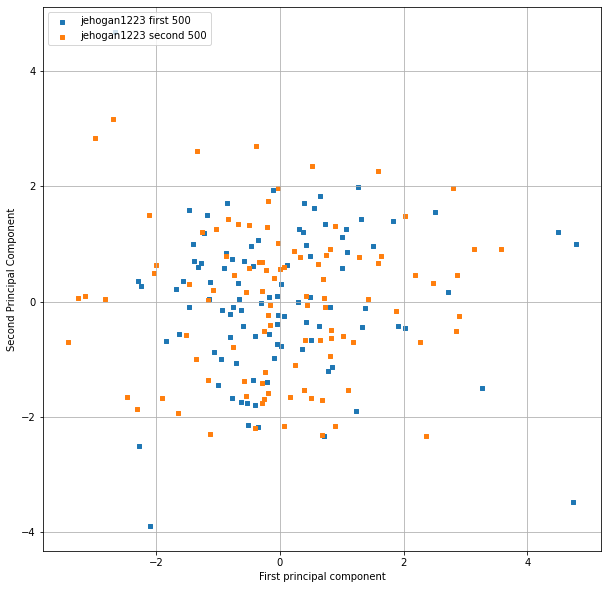

In [519]:
first = playlistfeaturesby[0]
second = playlistfeaturesby[6]

x_pca1 = playlist_pca(first)
x_pca2 = playlist_pca(second)

print(ttest_ind(first, second))

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(x_pca1[:,0],x_pca1[:,1], s=10, marker="s", label='jehogan1223 first 500')
ax1.scatter(x_pca2[:,0],x_pca2[:,1], s=10, marker="s", label='jehogan1223 second 500')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(loc='upper left')
ax1.grid(True)
plt.show()

In [486]:
ttest_ind(first, second)

Ttest_indResult(statistic=array([-2.14681475, -5.27006364, -1.78354126, -1.7396878 , -1.58841963,
       -0.54828093,  1.68894501, -1.58922369, -2.73885325, -5.77267324,
        6.19700486]), pvalue=array([3.32776454e-02, 4.24297148e-07, 7.63475896e-02, 8.37899365e-02,
       1.14117515e-01, 5.84244574e-01, 9.31303398e-02, 1.13935851e-01,
       6.84736861e-03, 3.80634960e-08, 4.48407076e-09]))

In [618]:
allsongfeatures

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.508,0.280,9,-17.104,1,0.0621,0.22000,0.728000,0.1130,0.151,136.550,0
1,0.578,0.286,1,-12.066,1,0.0313,0.37500,0.001240,0.2020,0.299,135.403,0
2,0.619,0.381,11,-10.691,0,0.0523,0.47100,0.031800,0.1010,0.312,139.929,0
3,0.644,0.547,7,-11.141,1,0.2520,0.18500,0.188000,0.1000,0.591,75.008,0
4,0.455,0.642,2,-9.382,0,0.0479,0.00684,0.264000,0.1120,0.467,170.063,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.569,0.571,2,-8.393,1,0.0311,0.14600,0.030400,0.1550,0.635,121.698,1
86,0.564,0.435,0,-9.387,1,0.0368,0.49600,0.000005,0.0861,0.332,143.713,1
87,0.598,0.809,5,-5.432,1,0.0294,0.01780,0.000016,0.3410,0.740,119.935,1
88,0.631,0.542,2,-11.278,1,0.0291,0.23100,0.000000,0.2000,0.704,108.770,1


In [682]:
allsongfeatures = pd.concat([df,dfcl])

allsongfeatures = allsongfeatures.reset_index(drop=True)

X = allsongfeatures[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split

y = allsongfeatures['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#fit on everything
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X,y)

predictions = logmodel.predict(X)
predictionsproba = logmodel.predict_proba(X)
from sklearn.metrics import classification_report
print(classification_report(y,predictions))

sharedliked = []
for predict in enumerate(predictionsproba):
    if .4 < predict[1][0] < .6:
        sharedliked.append(predict[0])
sharedliked
sharedlikedsongs = allsongfeatures.iloc[sharedliked]

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.84      0.94      0.89        90

    accuracy                           0.85       140
   macro avg       0.86      0.81      0.83       140
weighted avg       0.85      0.85      0.85       140



In [706]:
allsongfeaturesmod = allsongfeatures
allsongfeaturesmod.loc[sharedliked,'Label'] = 2

C:\Users\hogan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


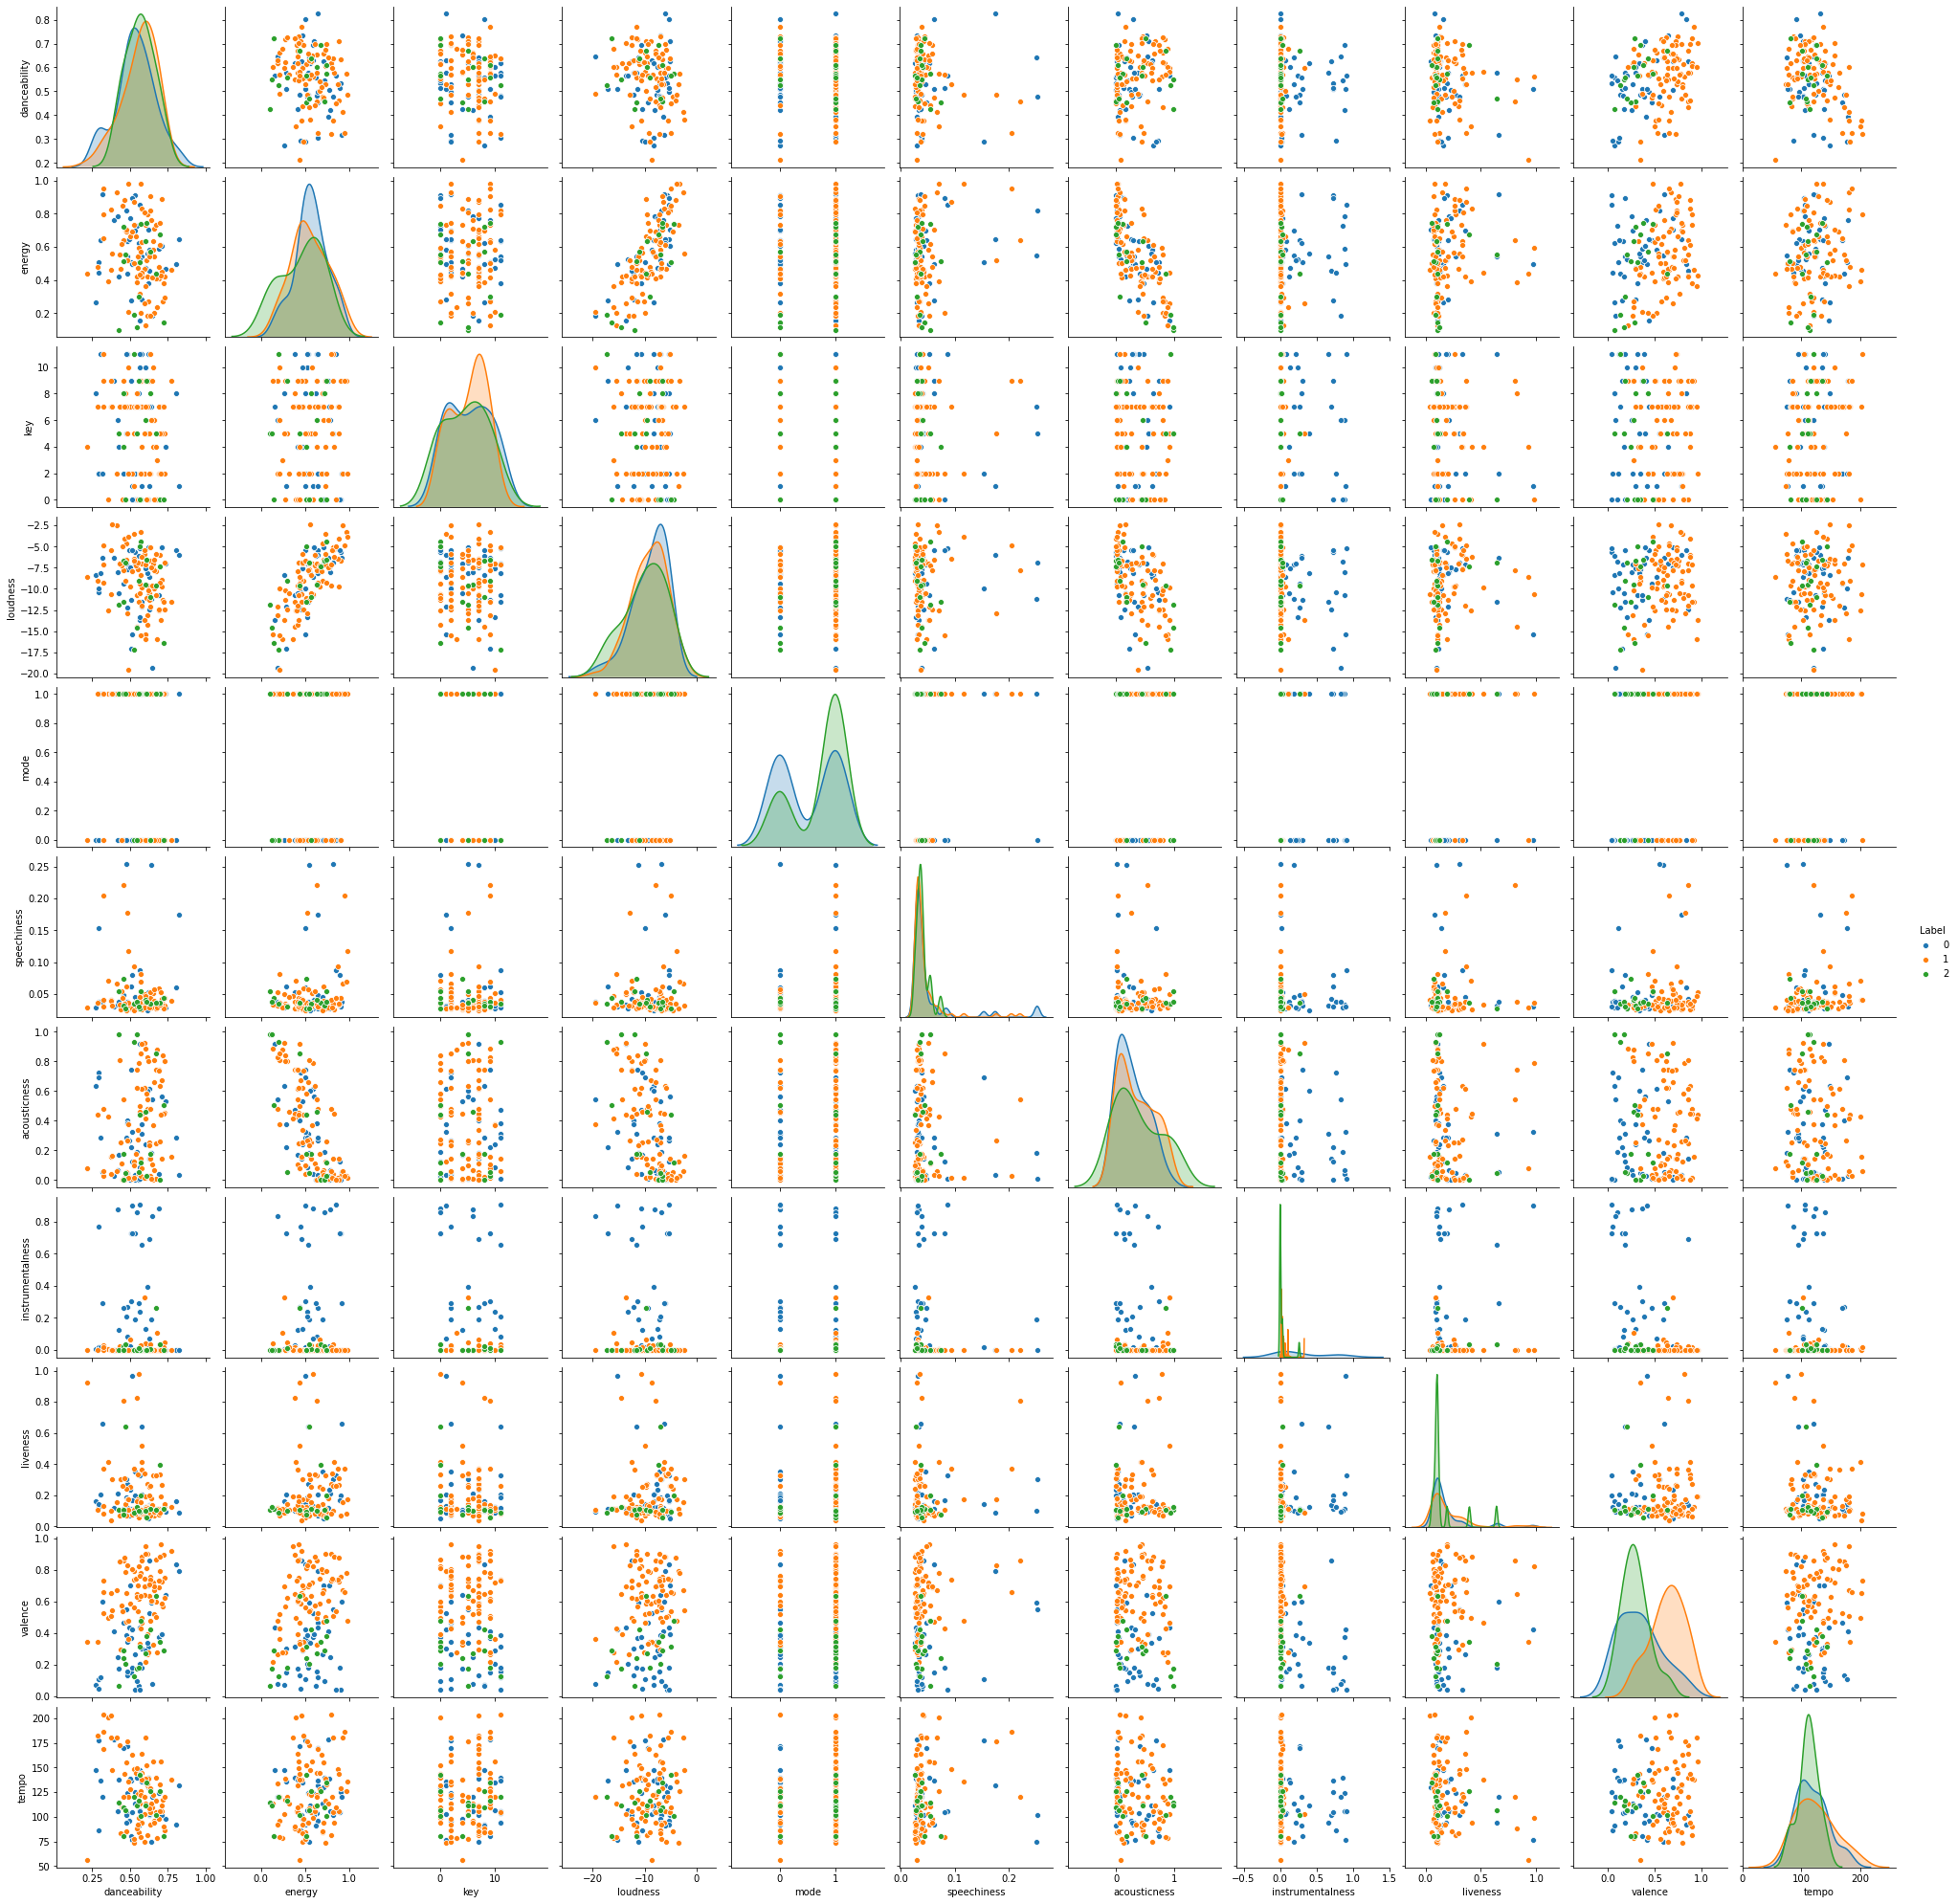

In [713]:
forplotting = allsongfeaturesmod[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','Label']]
sns.pairplot(forplotting,hue = 'Label')

In [657]:
allsongfeatures

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Label
0,0.508,0.280,9,-17.104,1,0.0621,0.22000,0.728000,0.1130,0.151,136.550,0
1,0.578,0.286,1,-12.066,1,0.0313,0.37500,0.001240,0.2020,0.299,135.403,0
2,0.619,0.381,11,-10.691,0,0.0523,0.47100,0.031800,0.1010,0.312,139.929,0
3,0.644,0.547,7,-11.141,1,0.2520,0.18500,0.188000,0.1000,0.591,75.008,0
4,0.455,0.642,2,-9.382,0,0.0479,0.00684,0.264000,0.1120,0.467,170.063,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.569,0.571,2,-8.393,1,0.0311,0.14600,0.030400,0.1550,0.635,121.698,1
86,0.564,0.435,0,-9.387,1,0.0368,0.49600,0.000005,0.0861,0.332,143.713,1
87,0.598,0.809,5,-5.432,1,0.0294,0.01780,0.000016,0.3410,0.740,119.935,1
88,0.631,0.542,2,-11.278,1,0.0291,0.23100,0.000000,0.2000,0.704,108.770,1


In [689]:
if token:
    sp = spotipy.Spotify(auth=token)
    sp.playlist_add_items('1bIaor5x76BylWyIZXqMeP', sharedlikedsongs['id'], position=None)

In [690]:
len(dfcl)

90